# Simulação de Monte Carlo

### Variáveis aleatórias e Densidade de probabilidade: 
Variáveis aleatórias são variáveis numéricas que podem variar de uma amostra a outra continuamente (variáveis contínuas) ou não (variáveis discretas).Compreende-se como função densidade de probabilidade a forma como se distribui a probabilidade de um evento ocorrer entre um intervalo de $c$ e $d$.  Dizemos que $ X $ é uma variável aleatória absolutamente contínua se existe uma função $  \mathbb{R}\rightarrow[0,+\infty) $ denominada função densidade de probabilidade $f(x)$, que satisfaz às seguintes propriedades:

$ f(x)\geq 0 $, para todo $ x \in\mathbb{R}_x $ :

$$ \int_{-\infty}^\infty f(x)dx=1 $$

Além disso, definimos para qualquer $ c, d \in \mathbb{R}_x $, com $c<d$ que:

$$\mathbb{P}(c < X < d)=\int_{c}^{d} f(x)dx	$$
Sendo $\mathbb{P}(c < X < d)$ a probabilidade de um evento ocorrer entre $c$ e $d$. Deve-se notar que,por definição, a probabilidade de ocorrer um ponto isolado é sempre zero, ou seja:
$$ \mathbb{P}(X=c)=\displaystyle \int_{c}^{c} f(x)dx=0 $$


## Metodologia de Monte Carlo (MMC)

O Método que se baseia em amostragens aleatórias massivas para obter resultados numéricos. Através de um elevado número de repetições sucessivas, calcula probabilidades heuristicamente, tal como se, de fato, se registrassem os resultados reais.
Exemplo: calcular o valor de $\pi$:

**Modelagem:** Considere um círculo de raio $R=5$ inscrito em um quadrado de lado $L=5$. Se analizarmos apenas 1/4 da área do circulo, chegamos à seguinte razão: 

$$ \frac{A_{circulo}} {4} \cdot \frac{1} {A_{Quadrado}}  = \frac{\pi}{4}$$

**a)** Desenhar um quadrado com $1/4$ do circulo inscrito nele.

**b)** Distribuir uniformente objetos pequenos e de tamanho uniforme (Ex. grãos de arroz) no quadrado. 

**c)** Contar o número de objetos dentro do círculo e o número total de objetos.

A razão entre os dois contadores é uma estimativa da razão entre as duas áreas, que multiplicada por 4, dá o valor de $\pi$


Faremos então esse experimento no Matlab para os números de amostras(grãos) $10^{3}, 10^{4}$ e $10^{7}$. Criaremos um vertor com pontos distribuidos aleatoriamente com a função $rand()$ (não tendenciosa). Cada elemento desse vetor deverá ser complexo para que exista duas dimensões. Em seguida faremos o teste para cada amostra (grão) se seu módulo é maior que o raio $R=5$:
$$ABS(x) \leq \sqrt{x_{Real}^{2}+x_{Img}^{2}} $$
Caso positivo, a função retornará 1 e caso negativo a função retornará 0.
Em seguida encontramos apenas o número de elementos dentro da circunferência e dividimos por pela quantidade total de elementos distribuido. O valor final será o resutado de $1/4$ da área do circulo, sendo necessário multiplicar por 4 o valor final pra encontrar a estimação  heurística do valor de $\pi$.

Neste método, chamamos de parâmetro o valor de $\pi$ real e estimador o valor de $\pi_{N}$ em que $N$ é o número de amostras. É esperado que para cada compilação haja uma diferença entre os valores de $\pi$ estimado. Isso ocorre por haver uma distribuição aleatória a qual possui uma certa confiabilidade. 

Valor real de pi =  3.141592653589793


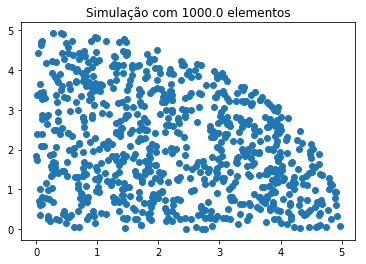

 ----------------------------------
 - Número de pontos =  1000.0
 - Razão entre as areas =   0.777
 - pi =   3.108
 - Erro =   0.03359265358979302


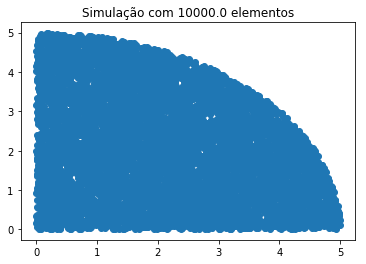

 ----------------------------------
 - Número de pontos =  10000.0
 - Razão entre as areas =   0.7871
 - pi =   3.1484
 - Erro =   -0.006807346410206971


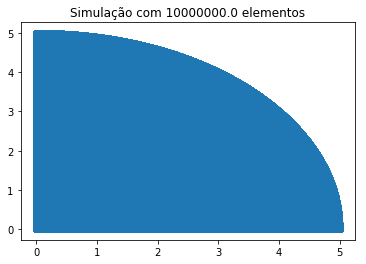

 ----------------------------------
 - Número de pontos =  10000000.0
 - Razão entre as areas =   0.7854492
 - pi =   3.1417968
 - Erro =   -0.0002041464102067181


In [1]:
lQuadrado = 5                                         # Comprimento do quadrado
rCirculo = lQuadrado                                  # Raio do circulo
vtPontos = [1e3,1e4,1e7]                              # 3 números de precisão : 1000, 10000, 10000000

import numpy as np
import matplotlib.pyplot as plt
print("Valor real de pi = ",np.pi)
for nPontos in vtPontos:
    # Pocisionar ponto no quadrado: Mutiplicando um número aleatório de 0 a
    # 1 pelo comprimento do quadrado para distribuir aleatoriamente nas
    # duas dimenções.
    _vtPontos = lQuadrado*np.random.rand(1,int(nPontos)) + 1j*lQuadrado*np.random.rand(1,int(nPontos))
    # Testa: 
    # Caso o modulo do vetor > raio do circulo --> 0 
    # Caso o modulo do vetor <= raio do circulo --> 1  
    indexPontCirculo =  np.abs(_vtPontos) <= rCirculo 
    # Encontra o numero de elementos dentro da area do circulo.
    razaoArea = len(indexPontCirculo[indexPontCirculo>0])/nPontos
    # Multiplica por 4 pois foi realizado apenas para 1/4 da area do circulo
    valordePi = 4*razaoArea
    # Retorna o valor de pi estimado  
    plt.figure()
    plt.title("Simulação com "+str(nPontos)+" elementos")
    vtPontosCirculo = _vtPontos[indexPontCirculo]    
    plt.scatter(vtPontosCirculo.real,vtPontosCirculo.imag)
    plt.show()
    print( ' ----------------------------------')
    print(' - Número de pontos = ', nPontos )
    print(' - Razão entre as areas =  ', razaoArea)
    print( ' - pi =  ' , valordePi)
    print( ' - Erro =  ' ,np.pi-valordePi)  
    

## Teorema central do limite
A razão pela qual a distribuição amostral normal ser tão importante é porque qualquer que seja a distriubuição da variavel em grandes amostras, a distribuição das médias amostrais tendem a convergir normalmente conforme o aumento do numero de amostras. Mesmo quando a distribuição da população de eventos não segue uma distribuição Normal, a distribuição da média dos dados converge para a distribuição Normal conforme o tamanho da amostra aumenta.Assim, a aproximação da distribuição Normal com média $ \mu $ e variância ${\sigma^2}$.

Compreende-se como a equação da distribuição normal:

$$f(x)=\frac{1}{\sqrt{2\pi\sigma^2}} \cdot e ^{\left[-\frac{1}{2}\left(\frac{x-\mu}{\sigma}\right)^2\right]}, \quad x\in(-\infty,\infty).	 $$
Em que $\mu$ é a média e $\sigma^{2}$ é a variância da distribuição.
A ditribuição normal tem formato definido semelhante a um sino. Montaremos um exemplo para determinados  $ \mu $ e  ${\sigma^2}$ usando a função  .

[1500 1501 1502 ..., 2498 2499 2500]


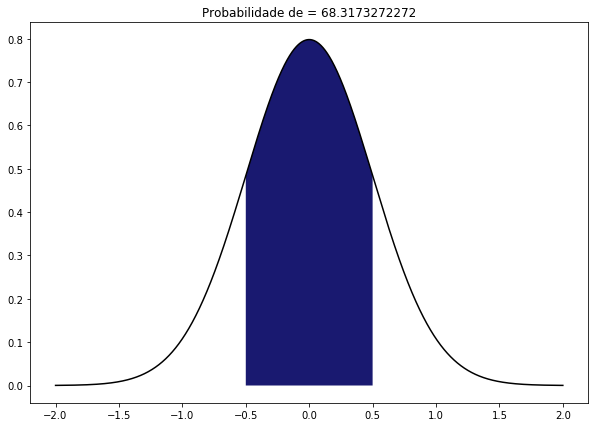

In [15]:
import numpy as np
from scipy import stats
mu=0                                       # Média
sigma =0.5                             # Desvio padrâo
T=0.001                                  # Taxa de amostragem
x=np.arange(-2,2+T,T)                           # Eixo x       
DistNorm=stats.norm.pdf(x,mu,sigma)    # Distribuição normal    
limite_esquerdo = np.max(np.where(x<-sigma))
limite_direito = np.min(np.where(x>sigma))
indices = np.arange(limite_esquerdo,limite_direito)  
print(indices)
import matplotlib.pyplot as plt 
# Encontra o local que se deseja estimar
plt.figure(1,[10,7])
prob1=np.sum(DistNorm[indices])*T*100        # Probabilidade de um evento ocorrer no intervalo
plt.plot(x,DistNorm,'k')                                       
plt.title('Probabilidade de = ' + str(prob1))      # Mostra valor verdadeiro de prob1
plt.fill_between(x[indices],DistNorm[indices],facecolor='midnightblue')
plt.show()

Vemos que nossa distribuição está centrada em $ \mu $. Caso quisesse-mos variar $ \mu $, esta se deslocaria para onde determinarmos desde que x esteja definida nela. Já o sigma define a largura dessa distribuição. A área grifada simboliza a probabilidade de um evento ocorrer entre $(-\sigma \leq x \leq \sigma$). 

**Ex:** A vida efetiva de um componente de turbina de avião é de 5000h e desvio-padrão de 40h. A distribuição da vida efetiva é bastante próxima da distribuição normal. Encontrar a probabilidade de que uma determinada amostra tenha vida efetiva maior que 5038h.

$R= 17,1 \%$.Calcua-se a probabilidade de uma amostra possuir a vida útil maior que 5034h pela integral da sua distribuição com x variando de $(5034 \leq x < \infty)$. (prob_ex.m)

O exemplo abaixo trata-se de um lançamento de dados por um número bastante grande de jogadores. Cada jogador tem direito a uma quantidade de jogadas em um dado de 6 faces (6 pontuações) e é tirado a média. Encontrado a média é elaborado o histograma da distribuição de frequência da média.

   
 Para  2  Jogadas
 Tempo com for =  0.030326000000002296 s
 Tempo sem for =  0.0004299999999943793 s
 Razão =  70.52558139627604  vezes
   
 Para  50  Jogadas
 Tempo com for =  0.10027500000001055 s
 Tempo sem for =  0.011656000000002109 s
 Razão =  8.602865477006898  vezes
   
 Para  100  Jogadas
 Tempo com for =  0.17413299999999765 s
 Tempo sem for =  0.019216000000000122 s
 Razão =  9.061875520399488  vezes
   
 Para  200  Jogadas
 Tempo com for =  0.31752699999999834 s
 Tempo sem for =  0.03817200000000298 s
 Razão =  8.31832233050334  vezes


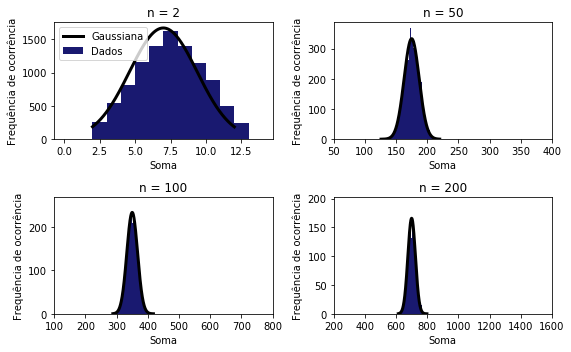

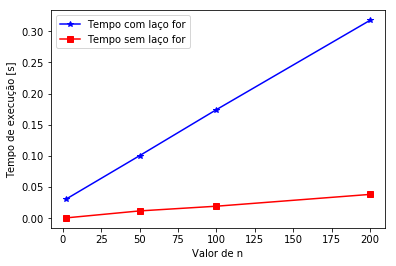

In [12]:
## Parâmetros
# Esse experimento é feito com um dado de 6 faces (6 pontuações de 1 a 6).
# Monta-se um vetor com cada jogada para que possa fazer um laço for com
# cada elemento.
Jogadas = [2,50,100,200]                                      # Número de jogadas do dado
Jogadores = 10000

## Simulando as jogadas
# Faremos aqui a criação das jogadas para cada jogador. Montaremos uma
# matriz em que as linhas representarão os resultados e as colunas
# representarão os jogadores. Em seguida será calculado a pontuação de cada
# jogador somando os pontos de cada jogada. Queremos mostrar também o
# quanto é prejudicial em termos de tempo o uso do laço FOR. Simularemos
# para os dois casos e computaremos o tempo:
import numpy as np   
import time 
import matplotlib.pyplot as plt
from matplotlib import mlab 
from scipy import stats
vtdf = np.ndarray([4])
vtdsem = np.ndarray([4])
plt.figure(1,[8,5])
for i_d in range(1,len(Jogadas)+1):
    n = Jogadas[i_d-1]                                        # Para um número "n" de jogadas
# Implementação com laço for:
    dcfs = time.clock()                                       # Inicia o cronômetro
    x = np.ndarray([n,Jogadores])
    y = np.ndarray([len(x[1,:])])
    for ic in range(n):
        x[ic,:]=np.ceil(6*np.random.rand(1,Jogadores))        # Gera números aleatórios entre o intervalo de 1 a 6 (faces do dado)

    for ik in range(len(x[1,:])):
        y[ik]=sum(x[:,ik])                                    # Soma os pontos de cada jogador
    df = time.clock() - dcfs
    
    print('\n')                                               # Pula linha
    print(' Para ',n,' Jogadas')                              # Mostra número de jogadas atual 
    print(' Tempo com for = ',df,'s')                         # Mostra tempo

# Implementação like-Matlab
    dsfs = time.clock()                                       # Inicia o cronômetro
    x = np.ceil(6*np.random.rand(n,Jogadores))                # Gera matriz com jogadas
    y = sum(x) # Calcula a pontuação de cada jogador, equivalente a sum(x,1) do Matlab
    dsem = time.clock() - dsfs                                # Tempo de execuçaõ sem FOR
    print(' Tempo sem for = ',dsem,'s')                       # Mostra tempo
    print(' Razão = ',df/dsem,' vezes')                       # Razão entre tempos 

## Display
# O número de plots dependerá da quantidade de elementos do vetor Jogadas.
# Em seguida no subplot() determinaremos quantos plots serão efetuados e
# qual a posição. Cada elemento de jogadas será representado em um quadrado
# no subplot.
    nPlots=len(Jogadas)                                       # Número de plots     
    pos = i_d  
    plt.subplot(220+pos)                                      # Determinação de posicionamento dos plots
    binCtrs = np.arange(0,n*7+1,1)                            # Centro de cada coluna dependem de "n"
    # Histograma gaussiano estimado
    mi = np.mean(y)                                           # Calcula média de cada jogador
    des = np.std(y)
    Tp = 1/Jogadores                                          # Calcula desvio padrão de cada jogador
    xi = np.arange(np.min(y),np.max(y),Tp)
    ye = (1/Tp)*stats.norm.pdf(xi,mi,des)                     # Histograma estimado 
    
    plt.plot(xi,ye,'k',linewidth=3.0)                         # Plota histograma esperado como linha
    plt.hist(y,bins=binCtrs,color='midnightblue')             # Plota Histograma para cada eixo
    if n>2:plt.xlim([n,8*n]) 
    plt.title('n = '+ str(n))
    plt.xlabel('Soma')
    plt.ylabel('Frequência de ocorrência')
    # Legenda apenas no primeiro
    if (i_d==1):
        plt.legend(['Gaussiana','Dados'],loc='upper left')
    
    vtdf[i_d-1] = df                                          # Armazena vetor com tempo com FOR
    vtdsem[i_d-1] = dsem                                      # Armazena vetor com tempo sem FOR    
    
plt.tight_layout()
plt.show()
    
# Novo plot para relacionar tempos de execução

plt.figure(2)
plt.plot(Jogadas,vtdf,'b-*')
plt.plot(Jogadas,vtdsem,'r-s')
plt.legend(['Tempo com laço for','Tempo sem laço for'])
plt.xlabel('Valor de n')
plt.ylabel('Tempo de execução [s]')
plt.show()

Nota-se que houve uma distribuição normal cujo média é dada por $mean(y)$ e o desvio padrão é dado por $std(y)$. Com um grande número de jogadores (10 mil) foi possível chegar a algo bastante aproximado à distribuição normal.
Além disso, pudemos ver que o uso de laço for torna o codigo extremamente lento chegando até 50x mais demorado que o código que não o usa.

Outro exemplo seria o Gráfico da Média de Conclusão Normalizada no SIGAA (Ensino -> Consultar índices academicos). Este gráfico mostra a média de conclusão de todos alunos que já se formaram no curso em questão, todos convergindo a uma média $\mu$ com um desvio padão de $\sigma$ os quais dependem do desempenho dos alunos. 

## Função distribuição cumulativa (CDF)
Seja X uma variável aleatória, discreta ou contínua, define-se a função F  como a função de distribuição acumulada (fd) da variável aleatória X como:
$$ F(x) = P(X \leq x ) $$
- Para variáveis discretas:
$$ F(x)=\sum_{i} P(x_{i})$$
para todo $i$ em que $x_{i}\leq x $.

- Para variáveis contínuas:
$$F(x)=\int_{-\infty}^{x} f(s)ds $$
sendo $f(s)$ a PDF de $X$.

No Python, usaremos a função $np.cumsum()$  para plotar empiricamente função distribuição cumulativa a partir de uma função densidade de probabilidade, calculada pela $stats.norm.pdf()$ .

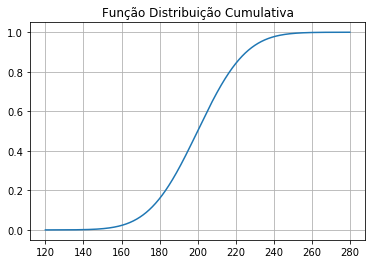

In [16]:
import scipy.stats as stats 
import numpy as np
mu=200                                                 # Média
sigma =20                                              # Desvio padrâo
T=0.001                                                # Taxa de amostragem
x=np.arange(120,280+T,T)                               # Eixo x       
DistNorm=stats.norm.pdf(x,mu,sigma)                    # Distribuição normal    

#cdfplot(DistNorm)                                     # Plot da CDF 
import matplotlib.pyplot as plt

y =np.cumsum(DistNorm)
y /= y[-1]
plt.title("Função Distribuição Cumulativa")
plt.plot(x,y)
plt.grid()
plt.show()